In [106]:
import pandas as pd
import numpy as np
import os
import string
from fuzzywuzzy import fuzz, process
import sklearn
import matplotlib.pyplot as plt

## EDA: Texas Water Spills

In [2]:
central_data = pd.read_csv('/Users/kchua/Documents/Data_Stories/2023-10-tx-produced-water-spills/data/central_cleaned.csv')
central_data.head()

,dist,district_edit,date_called_in,date_called_in_edit,date_of_spill,date_of_spill_edit,spill_number,rrc_job_number,operator_rp,operator_edit,...,cleanup_oversight_austin,status,comments,compliance_date,file,sheet,cleanup_criteria,cleanup_oversight,rrc_job_number_2,my_of_spill
0,04,4,2013-01-13,2013-01-13,2013-01-13,2013-01-13,04-1238,2013-381,Headington Oil Company,HEADINGTON OIL,...,NaN,assessment phase,Leak in gathering line DS,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
1,06,6,2013-01-06,2013-01-06,2013-01-05,2013-01-05,1291,2013-06-195,"Quantum Resources Management, LLC",QUANTUM RESOURCES,...,41284,JH,NaN,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
2,7C,7C,2013-01-22,2013-01-22,2013-01-22,2013-01-22,1829,324,EOG Resources,EOG Resources,...,No,assessment phase,Dump valve misfired,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
3,7C,7C,2013-01-14,2013-01-14,2013-01-13,2013-01-13,1830,191,Pioneer Natural Res. USA Inc.,Pioneer Natural Resources (acq. by ExxonMobil ...,...,No,cleanup phase,"water leg plugged up water went in oil tank, r...",NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01
4,7C,7C,2013-01-14,2013-01-14,2013-01-05,2013-01-05,1832,192,"Molopo Energy Texas, LLC","MOLOPO ENERGY TEXAS, LLC",...,No,cleanup phase,heater treater was not started ran prod tank over,NaN,logs/master/pattern1/All Dist Spill Log - FY 2...,January 13,NaN,NaN,NaN,2013-01-01


In [3]:
district_data = pd.read_csv('/Users/kchua/Documents/Data_Stories/2023-10-tx-produced-water-spills/data/district_cleaned.csv')
district_data.head()

/var/folders/7b/llw41rn55vn8yn15rg03bjxh0000gn/T/ipykernel_87961/1869649935.py:1: DtypeWarning: Columns (31,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  district_data = pd.read_csv('/Users/kchua/Documents/Data_Stories/2023-10-tx-produced-water-spills/data/district_cleaned.csv')


,dist,district_edit,date_of_spill,date_of_spill_edit,date_called_in,date_called_in_edit,spill_number,rrc_job_number,operator_rp,operator_edit,...,soil_water_samples_required,spill_letter_date,inspector,witn_tech,date_witnessed,witn_results,cleanup_method,tph_rcvd,tph_comments,duplicate
0,1,1,2013-06-26,2013-06-26,2013-06-27,2013-06-27,75,2013-01-7741,"SABCO OPERATING COMPANY, LLC","SABCO OPERATING COMPANY, LLC",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2013-03-12,2013-03-12,2013-03-12,2013-03-12,31,2013-01-2973,ANADARKO E&P COMPANY LP,Anadarko (acq. by Occidental 2019),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2013-04-24,2013-04-24,2013-04-24,2013-04-24,48,2013-01-5040,ANADARKO E&P COMPANY LP,Anadarko (acq. by Occidental 2019),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2013-04-25,2013-04-25,2013-04-25,2013-04-25,49,2013-01-5076,ANADARKO E&P COMPANY LP,Anadarko (acq. by Occidental 2019),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2013-06-19,2013-06-19,2013-06-19,2013-06-19,70,2013-01-7369,ANADARKO E&P COMPANY LP,Anadarko (acq. by Occidental 2019),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check out column names
print(len(central_data.columns.tolist()))
central_data.columns.tolist()

56


['dist',
 'district_edit',
 'date_called_in',
 'date_called_in_edit',
 'date_of_spill',
 'date_of_spill_edit',
 'spill_number',
 'rrc_job_number',
 'operator_rp',
 'operator_edit',
 'lease_facility_name',
 'rrc_id_number',
 'county',
 'county_edit',
 'type_operation',
 'source',
 'probable_cause',
 'probable_cause_edit',
 'release_crude_oil',
 'release_crude_oil_edit',
 'release_cond',
 'release_prod_wtr',
 'release_prod_water_edit',
 'release_gas',
 'recovery_crude_oil',
 'recovery_crude_oil_edit',
 'recovery_cond',
 'recovery_prod_wtr',
 'recovery_prod_water_edit',
 'basis',
 'other_rptd_loss_type',
 'loss',
 'recovery',
 'affected_area',
 'spill_on_water',
 'spill_on_water_edit',
 'ospra',
 'swr_20',
 'swr_98exempt',
 'cleanup_criteria_swr_91',
 'cleanup_criteria_7_00_doc',
 'cleanup_criteria_case_specific',
 'form_h_8rqrd',
 'form_h_8rqrd_edit',
 'date_h_8rcvd',
 'cleanup_oversight_district',
 'cleanup_oversight_austin',
 'status',
 'comments',
 'compliance_date',
 'file',
 'sheet'

In [6]:
for i in central_data.columns.tolist(): 
    print(central_data[i].value_counts())
    print()
    print()

dist
8      4031
8A     1209
08      958
7C      936
03      599
10      524
01      458
04      270
1       255
02      222
09      176
6       158
7B      149
6E      113
2       112
06       43
3        37
5        29
9        22
4         7
05        6
6e        4
10-       1
7c        1
Name: count, dtype: int64


district_edit
8     4990
8A    1210
7C     938
1      714
3      636
10     527
2      333
4      277
6      201
9      198
7B     150
6E     117
5       35
Name: count, dtype: int64


date_called_in
2015-10-21    22
2022-12-27    21
2015-01-05    19
2021-02-23    18
2016-07-11    18
              ..
2019-01-27     1
2019-02-10     1
2019-02-23     1
2019-02-01     1
2021-02-03     1
Name: count, Length: 2985, dtype: int64


date_called_in_edit
2015-10-21    22
2022-12-27    21
2015-01-05    19
2016-07-11    18
2021-02-23    18
              ..
2019-02-07     1
2019-02-05     1
2019-03-24     1
2019-03-19     1
2021-02-03     1
Name: count, Length: 2948, dtype: int64


d

In [29]:
# Reason-related columns
reason_cols = [
'type_operation',
'source', 
'probable_cause_edit',
'comments',
]

rcc_cols = [
'rrc_job_number', 
'rrc_id_number',
'rrc_job_number_2'
]

In [86]:
# Location-related columns
loc_cols = [
'district_edit', 
'operator_edit',
'lease_facility_name',
'county_edit', 
'affected_area', 
'spill_on_water_edit'
]

# Whistleblower/reporting/regulations-specific columns 
rep_cols = [
'date_called_in_edit',
'date_of_spill_edit',
'spill_number', 
'rcc_job_number'
'basis', 
'affected_area', 
'swr_20', 
'swr_98exempt',
'cleanup_criteria', 
'cleanup_criteria_swr_91', 
'cleanup_criteria_7_00_doc', 
'cleanup_criteria_case_specific', 
'form_h_8rqrd_edit',
'date_h_8rcvd', 
'cleanup_oversight', 
'cleanup_oversight_district', 
'cleanup_oversight_austin', 
'status', 
'compliance_data'
]

In [87]:
print(central_data.shape[0])
print(central_data['rrc_job_number'].nunique())
central_data['rrc_job_number'].nunique()/central_data.shape[0]

10326
10239


0.9915746658919233

In [102]:
#Let's see the repeats for rrc_job_number
duplicate_rows = central_data[central_data.duplicated(subset='rrc_job_number', keep=False)]
duplicate_rows[['rrc_job_number'] + loc_cols + reason_cols].sort_values(by='rrc_job_number').head(10)

,rrc_job_number,district_edit,operator_edit,lease_facility_name,county_edit,affected_area,spill_on_water_edit,type_operation,source,probable_cause_edit,comments
3404,10925,8,XTO Energy (ExxonMobil subsidiary),Maralo 32,Midland,1,NO,injection/disposal,pump,CORROSION,"2"" nipple broke off pump"
876,10925,7C,"TELESIS OPERATING CO., INC.",Sheen Bros -A-,Schleicher,"1= on land, non-sensitive area",NO,production,tank battery,unknown,Tank Ranover
87,13-1567,8,SAGA PETROLEUM,Shipley Queen Sand Unit,Ward,2,NO,production,flowline,CORROSION,flowline ruptured - Sens Area?
123,13-1567,10,EAGLE ROCK MID-CONTINENT OP LLC,Boucher,Hemphill,1,NO,production,tank battery,WEATHER,Lightning Strike ruptured tanks
293,13-1935,8A,Occidental Petroleum,Gaines Wasson Clearfork Unit,Gaines,1,NO,production,tank battery,MECHANICAL FAILURE,tank overflowed
106,13-1935,8,Kinder Morgan,Yates Field Unit,Pecos,3,NO,injection/disposal,flowline,CORROSION,"8"" injection line leak - Dry Draw"
10300,13-2149,8A,Kinder Morgan,Sacros Unit,Scurry,4,YES,injection/disposal,flowline,CORROSION,water line ruptured - Ennis Creek
10299,13-2149,8A,Kinder Morgan,Sacroc Unit,Scurry,4,YES,injection/disposal,flowline,CORROSION,"10"" injection line leak - Creek bed to Ennis C..."
372,13-2381,8A,Apache,Yellowhouse Unit,Hockley,1,NO,production,tank battery,WEATHER,"power outage, tank overflowed"
115,13-2381,8,RANGE PRODUCTION,Edmondson A,Glasscock,1,NO,production,tank battery,MECHANICAL FAILURE,glass broke on high pressure separator


In [105]:
#Let's see the repeats for rrc_job_number
print(central_data['rrc_id_number'].isnull().sum())
duplicate_rows = central_data[central_data.duplicated(subset='rrc_id_number', keep=False)]
duplicate_rows[['rrc_id_number', 'rrc_job_number'] + loc_cols + reason_cols].sort_values(by='rrc_id_number').head(20)

393


,rrc_id_number,rrc_job_number,district_edit,operator_edit,lease_facility_name,county_edit,affected_area,spill_on_water_edit,type_operation,source,probable_cause_edit,comments
5556,-,95401,6,BP AMERICA,"Woodlawn Central Facility / 32 37' 58.05"", -94...",Harrison,1,NO,Processing Facility,Tank Battery,valve failure,NaN
8900,-,281336,6E,East Texas Saltwater Disposal,Alexander - Bivins Pressure Line,Gregg,Land--Sensitive Area,NO,Transportation,Pipeline,MECHANICAL FAILURE,Operator reported arelease resultig in ~500bbl...
8117,-,234662,8,Targa,Pipeline,Crane,Land--Non-sensitive Area,NO,Transportation,Pipeline,CORROSION,Hole on outside of pipe from corrosion caused ...
4753,-,64902,6,SAMSON LONE STAR,"Kinder Morgan NW Sales Point (31 46.108, -94 4...",Nacogdoches,1,NO,Transportation,tank battery,line broke due to excessive cold,REMEDIATION
9220,-,304651,1,"SILVERBOW RESOURCES OPER, LLC",8-in Gathering Line,McMullen,Land--Non-sensitive Area,NO,Transportation,Gathering Line,CORROSION,NaN
9365,-,314123,6E,East Texas Saltwater Disposal,Zigler Gravity line,Gregg,Wet/Flowing Waterway,YES,Transportation,Pipeline,MECHANICAL FAILURE,Mr. Jernigan reported a failed clamp on the li...
5008,-,70633,6,East Texas Saltwater Disposal,"Thomas Mimms Property (GPS ~ 32.576818, -94.83...",Gregg,2,?,Transportation,Pipeline,NaN,NaN
5266,-,82474,6E,East Texas Saltwater Disposal,"Chase Crest Cir / GPS 32.5556, -94.7944",Gregg,4,YES,Transportation,pipeline,NaN,NaN
8005,-,230231,2,Marathon Oil,East Karnes Central Facility,Karnes,Land--Non-sensitive Area,NO,Processing,Flowline,CORROSION,NaN
558,00074,13-10826,8,"IMPERIAL OPERATING CO., L.L.C.",Imperial S.W.D.,Pecos,1,NO,commercial disposal,tank battery,HUMAN ERROR,"drill mud dispose, ran commercial tanks over"


In [73]:
central_data['affected_area'].unique()

array(['1', '1= on land, non-sensitive area', '3', '2', '4',
       '2=on land, sensitive area.', nan, '5', '?', '7', '3, 2', 'Verbal',
       'verbal', 'H-8', '3=dry  waterway', 'Letter', 'Email',
       '4=Wet/flowing waterway', '1 & 2', 'VERBAL', 'EMAIL', 'LETTER',
       '1&4', '1, 3', '2,4', '2, 3', '6', '1,3', '1, 4', '1,4', '2, 4',
       '2, 3,4', '4 (private pond-contained)', 'EMAL',
       '1 (contianed in concrete TB)', 'LANDOWNER', '1, 2, 3', '1, 3, 4',
       '1, 2', '1, 2, 4', 'Land--Non-sensitive Area',
       'Land--Sensitive Area', 'Land--Non-sensitive area',
       'Wet/Flowing Waterway', 'Dry Waterway', 'Private Pond',
       'In lined FW', 'land--Non-sensitive Area', 'Inland Bay Estuary',
       'No Call', 'Land --Sensitive Area'], dtype=object)

In [74]:
central_data['spill_on_water_edit'].unique()

array(['NO', 'YES', nan, '?', 'Sulfide Reducer', 'Paraffin', 'Rainwater',
       'UNKNOWN', '1', 'ISOLATED PUDDLES', 'undetermined', 'no', 'No'],
      dtype=object)

In [75]:
central_data['cleanup_criteria'].unique()

array([nan, 'SWR 91', 'Case Specific', 'no', 'No', 'Yes',
       'Condensate Guidance', 'SWR 92', 'SWR 93', 'SWR91', 'sWR 91',
       'case specific'], dtype=object)

In [76]:
central_data['type_operation'].unique()

array(['production', 'injection/disposal', 'commercial disposal',
       'transportation', nan, 'other', 'Production', 'Other', 'drilling',
       'processing', 'tank farm', 'SWD', 'Completion', 'Disposal',
       'disposal', 'storage', 'Pipeline', 'Drilling', 'Plant', 'DISPOSAL',
       'swd', 'Fracking', 'Trucking', 'Plugging', 'Completions',
       'Gathering', 'pipeline', 'Transport', 'Orphan', 'Gas Plant',
       'midstream', 'Gathering Line', 'SW LINE', 'Disposal facility',
       'Processing', 'pits', 'injection', 'PRODUCTION', 'PIGGING',
       'PIPELINE', 'ABANDONED', 'INJ/DISPOSAL', 'RECTIFIER',
       'WATER HAULER', 'TRANSPORT', 'INJECTION/DISPOSAL', 'GATHERING',
       'Transportation', 'PROCESSING', 'DRILLING', 'TRANSPORTATION',
       'COMMINGLE', 'waste collection and skimming',
       'Processing Facility', 'transportation/disposal', 'fracking',
       'INJ/DISP', 'TANK BATTERY', "Disposal (P&A'd well)", 'DCP',
       'INJECTION/ DISPOSAL', 'COMPLETIONS', 'CPF', 'Trasp

In [11]:
# Maybe combine this with the "comments" column
central_data['probable_cause_edit'].tolist()

['CORROSION',
 'unknown',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'unknown',
 'MECHANICAL FAILURE',
 'other',
 'CORROSION',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'HUMAN ERROR',
 'HUMAN ERROR',
 'CORROSION',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'CORROSION',
 'HUMAN ERROR',
 'HUMAN ERROR',
 'CORROSION',
 'WEATHER',
 'CORROSION',
 'MECHANICAL FAILURE',
 'CORROSION',
 'MECHANICAL FAILURE',
 'CORROSION',
 'CORROSION',
 'CORROSION',
 'WEATHER',
 'MECHANICAL FAILURE',
 'CORROSION',
 'HUMAN ERROR',
 'HUMAN ERROR',
 'MECHANICAL FAILURE',
 'CORROSION',
 'HUMAN ERROR',
 'MECHANICAL FAILURE',
 'CORROSION',
 'MECHANICAL FAILURE',
 'CORROSION',
 'CORROSION',
 'CORROSION',
 'HUMAN ERROR',
 'CORROSION',
 'HUMAN ERROR',
 'CORROSION',
 'CORROSION',
 'HUMAN ERROR',
 'MECHANICAL FAILURE',
 'CORROSION',
 'CORROSION',
 'MECHANICAL FAILURE',
 'MECHANICAL FAILURE',
 'HUMAN ERROR',
 'WEATHER',
 'WEATHER',
 'MECHANICAL FAILURE',
 'HUMAN ERR

In [12]:
# Maybe do a further combination
central_data['source'].value_counts()

source
tank battery        3131
flowline            1905
Tank Battery        1394
well                 739
Flowline             603
                    ... 
storage tank           1
Water Dump Valve       1
Polyline               1
Injection Line         1
FIBERGLASS TANK        1
Name: count, Length: 255, dtype: int64

## Diving into "Source" Column

In [13]:
# Checking the coverage
central_data['source'].isnull().sum()
# central_data[central_data['source'].isnull()]['source'].tolist()

59

In [14]:
central_data.shape[0]

10326

In [15]:
# Calculate coverage
coverage_percentage = ((len(central_data)-central_data['source'].isnull().sum())/ len(central_data)) * 100

print(f"Coverage of: {coverage_percentage:.2f}%")

Coverage of: 99.43%


In [16]:
# Cleaning and fuzzy matching the source values

# Remove punctuation and whitespace
def remove_punctuation_and_whitespace(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join(text.split())
    return text

# Lowercasing
def clean_column(col): 
    clean_col = col.str.lower()
    clean_col = clean_col.fillna('Null')
    clean_col = clean_col.replace('', 'Null')
    clean_col = clean_col.apply(lambda x: x.strip())
    clean_col = clean_col.apply(remove_punctuation_and_whitespace)
    return clean_col
    
central_data['source_CLEAN'] = clean_column(central_data['source'])
central_data['source_CLEAN'].isnull().sum()

0

In [17]:
# Find the best match spelling-wise
def find_best_match(input_str, choices):
    return max(choices, key=lambda choice: fuzz.ratio(input_str, choice))

central_data['source_CLEAN_BEST_MATCH'] = central_data['source_CLEAN'].apply(lambda x: find_best_match(x, central_data['source_CLEAN'].unique()))

In [18]:
unique_vals = central_data['source_CLEAN_BEST_MATCH'].unique()
unique_vals

array(['gathering line', 'tank battery', 'flowline', 'well', 'Null',
       'vehicle', 'pump', 'pipeline', 'frac tanks', 'tanker truck',
       'tanks', 'other', 'pit', 'plant', 'tank', 'heater treater',
       'load line', 'equipment', 'tank overflow', 'sump frac tank',
       'vacuum truck', 'stuffing box', 'wellhead', 'storage tank',
       'discharge line', 'unknown', 'coupling', 'hose', 'frac tank',
       'flow line', 'drain valve broke', 'transfer line', '',
       'regulator gauge', 'galvanized line', 'crude gathering', 'truck',
       '1 circ line', 'separator', 'separator line', 'valve',
       'pipeflow line', 'gun barrel', 'valve choke', 'waterline',
       'open top tank', 'bop stack', 'scrubbersvru', 'vent scrubber',
       'vapor recovery tower', 'transferring oil', 'vent line',
       'oil sampler', 'fitting', '2 hammer union', 'drain valve',
       'flare stack', 'compressor station', 'flare', 'thief hatch',
       'level safety', 'man hatch', 'sight glass broke', 'oil

In [19]:
#for i in central_data['source_CLEAN_BEST_MATCH'].unique(): 
#    print("'", i, "'", ',')
#x = c/p-ed output
#[i.strip() for i in x]

In [20]:
# Okay, there are no discrepancies between source_CLEAN and source_CLEAN_BEST_MATCH
# meaning that the fuzzy-matching in source_CLEAN_BEST_MATCH works
# or at the very least, you can securely manually match the rest
discrepancies = central_data[['source', 'source_CLEAN', 'source_CLEAN_BEST_MATCH']]
discrepancies = discrepancies[discrepancies['source'] != discrepancies['source_CLEAN_BEST_MATCH']]
discrepancies.sample(10)

,source,source_CLEAN,source_CLEAN_BEST_MATCH
5251,HEATER TREATER,heater treater,heater treater
2715,Gathering Line,gathering line,gathering line
9441,Tank Battery,tank battery,tank battery
8305,Tank Battery,tank battery,tank battery
8427,Other,other,other
8952,Pump,pump,pump
7402,Tank Battery,tank battery,tank battery
7592,Tank Battery,tank battery,tank battery
689,Hose,hose,hose
4313,Pipeline,pipeline,pipeline


In [21]:
central_data['source_CLEAN_BEST_MATCH'].value_counts().head(20)

source_CLEAN_BEST_MATCH
tank battery      4721
flowline          2595
well              1092
other              398
pipeline           285
pump               271
gathering line     269
tank                65
Null                59
pit                 59
heater treater      59
vehicle             41
separator           27
unknown             25
wellhead            21
plant               21
transfer line       15
storage tank        14
gun barrel          11
tanks                9
Name: count, dtype: int64

In [22]:
central_data['source_CLEAN_BEST_MATCH'].nunique()

196

In [23]:
central_data['source_CLEAN_BEST_MATCH'].shape

(10326,)

/Users/kchua/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kchua/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


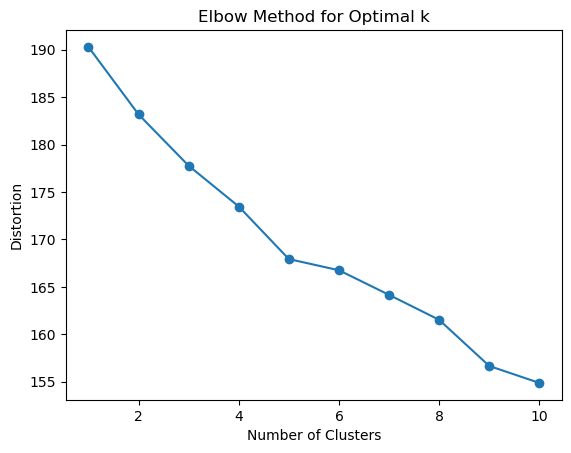

In [24]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Example data
word_list = unique_vals

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(word_list)

# Experiment with a range of clusters
max_clusters = 10
distortions = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [25]:
optimal_clusters = 9  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

word_list_clusters = list(zip(word_list, kmeans.labels_))

for cluster_id in range(optimal_clusters):
    cluster_words = [word for word, label in word_list_clusters if label == cluster_id]
    print(f"Cluster {cluster_id + 1}: {cluster_words}")
    print()
    print()

Cluster 1: ['tank battery', 'tank', 'tank overflow', 'sump frac tank', 'storage tank', 'frac tank', 'open top tank', 'tank hatch', 'tank gb', 'oil tank load line', 'tank mixer', 'tank load line', 'water tank', 'tank site glass', 'tank batery', 'tank batttery', 'tank swedge', 'tank farm', 'drip tank', 'mud tank', 'tank overflowed', 'salt water tank', 'fiberglass tank']


Cluster 2: ['gathering line', 'crude gathering', 'gathering line leak', 'gathering', 'pipline leak']


Cluster 3: ['separator', 'separator line', 'oil dump line', 'water dump', 'water dump valve', '4 dump line', 'hp separator', 'high prressure separator', 'separator dump line', 'dump line', 'test separator', 'dump on separator']


Cluster 4: ['flowline', 'flowline hammer union', 'flowline at wellhead', 'flowline leak', 'flowline manifold header', '6 flowline', 'gun barrel flowline', '2 12 flowline']


Cluster 5: ['frac tanks', 'tanks', 'storage tanks', 'production tanks', 'flowback op frac tanks']


Cluster 6: ['Null', 

In [26]:
# Temporarily using the cluster values 
word_cluster_dict = dict(zip(word_list, kmeans.labels_))
central_data['temp_cluster'] = central_data['source_CLEAN_BEST_MATCH'].apply(lambda x: word_cluster_dict[x])
central_data['temp_cluster'].value_counts()

temp_cluster
0    4833
3    2602
5    1106
8    1098
6     287
1     276
7      69
2      39
4      16
Name: count, dtype: int64

In [27]:
operators = central_data['operator_edit'].head(10).tolist()
operators

['HEADINGTON OIL',
 'QUANTUM RESOURCES',
 'EOG Resources',
 'Pioneer Natural Resources (acq. by ExxonMobil 2023)',
 'MOLOPO ENERGY TEXAS, LLC',
 'Apache',
 'EOG Resources',
 'Apache',
 'Pioneer Natural Resources (acq. by ExxonMobil 2023)',
 'Apache']

In [28]:
# Quick look-see at any big imbalances in clusters re: 
# Lots of hits on clusters 1 and 2

for i in operators: 
    print(i)
    print(central_data[central_data['operator_edit'] == i]['temp_cluster'].value_counts(normalize=True))
    print()
    print()

HEADINGTON OIL
temp_cluster
1    1.0
Name: proportion, dtype: float64


QUANTUM RESOURCES
temp_cluster
0    0.454545
3    0.272727
6    0.090909
7    0.090909
8    0.090909
Name: proportion, dtype: float64


EOG Resources
temp_cluster
0    0.375000
3    0.263889
5    0.166667
1    0.076389
6    0.034722
8    0.034722
7    0.020833
2    0.020833
4    0.006944
Name: proportion, dtype: float64


Pioneer Natural Resources (acq. by ExxonMobil 2023)
temp_cluster
0    0.592282
3    0.181208
8    0.142617
5    0.067114
6    0.010067
7    0.001678
1    0.001678
2    0.001678
4    0.001678
Name: proportion, dtype: float64


MOLOPO ENERGY TEXAS, LLC
temp_cluster
0    1.0
Name: proportion, dtype: float64


Apache
temp_cluster
0    0.498258
3    0.268293
8    0.108014
5    0.055749
1    0.038328
6    0.027875
7    0.003484
Name: proportion, dtype: float64


EOG Resources
temp_cluster
0    0.375000
3    0.263889
5    0.166667
1    0.076389
6    0.034722
8    0.034722
7    0.020833
2    0.020833
4   

In [ ]:
# After understanding the fracking process and deploying clustering - 
# Creating manual match dictionary for "source"
source_manual_matches = {
 'gathering line',
 'tank battery',
 'flowline',
 'well',
 'Null',
 'vehicle',
 'pump',
 'pipeline',
 'frac tanks',
 'tanker truck',
 'tanks',
 'other',
 'pit',
 'plant',
 'tank',
 'heater treater',
 'load line',
 'equipment',
 'tank overflow',
 'sump frac tank',
 'vacuum truck',
 'stuffing box',
 'wellhead',
 'storage tank',
 'discharge line',
 'unknown',
 'coupling',
 'hose',
 'frac tank',
 'flow line',
 'drain valve broke',
 'transfer line',
 '': 'Null', 
 'regulator gauge',
 'galvanized line',
 'crude gathering',
 'truck',
 '1 circ line',
 'separator',
 'separator line',
 'valve',
 'pipeflow line',
 'gun barrel',
 'valve choke',
 'waterline',
 'open top tank',
 'bop stack',
 'scrubbersvru',
 'vent scrubber',
 'vapor recovery tower',
 'transferring oil',
 'vent line',
 'oil sampler',
 'fitting',
 '2 hammer union',
 'drain valve',
 'flare stack',
 'compressor station',
 'flare',
 'thief hatch',
 'level safety',
 'man hatch',
 'sight glass broke',
 'oil dump line',
 'safety valve',
 'riser',
 'gathering line leak',
 'line from heater treater',
 'flowline hammer union',
 'tank hatch',
 'jet pump hose',
 'hammer union',
 'hilevel liq switch',
 'charge pump',
 'gas plant',
 'open valve',
 'storage tanks',
 'gathering',
 'sw line',
 'flowline at wellhead',
 'water dump',
 'gatherer',
 'oil pump',
 'firewall',
 'tank gb',
 'reserve pit',
 'production line',
 'hot oil truck',
 'water dump valve',
 'polyline',
 'injection line',
 '4 dump line',
 'seperator',
 'oil tank load line',
 'pipline leak',
 'flowline leak',
 'site glass on heat treat',
 'pl riser',
 'line',
 'circulating pump',
 'flowline manifold header',
 'hp separator',
 'suction line',
 'lact pump',
 'gatering line',
 'fitting water meter',
 'diaphram pump hose',
 '2 part valve',
 'well head',
 '6 flowline',
 'station',
 'swd pump',
 'production tanks',
 'lact unit',
 'pvc bore',
 'well 6',
 'produced water system',
 'circulating tower',
 'tank mixer',
 'tanker',
 'tank load line',
 'spill pot',
 'tubing',
 'facility',
 'water tank',
 'wellhead swedge',
 'tank site glass',
 'larkenhead',
 'flowline riser from well',
 'trunk line',
 'low pressure line',
 'hose suction pump',
 '8 lead line',
 'high prressure separator',
 '6 gravity line',
 'ruptured 4 line',
 'water transfer line',
 '8 pvc pipe',
 'pileline',
 'separator dump line',
 'tank batery',
 'casing valve',
 'discharge',
 'transfer pump',
 'water leg',
 'tank batttery',
 'tubing line',
 'transport',
 'dump line',
 'condensate sales line',
 'pipeline header',
 'pipe',
 'connector',
 'gun barrel flowline',
 'well stuffing box',
 'tank swedge',
 '2 12 flowline',
 'nipple on casing',
 'tank farm',
 'test separator',
 'pump jack',
 'pump hose',
 'choke body',
 'coiled tubing',
 'trailer',
 'pump flowline rupture',
 'transfer pump seal',
 'strainer valve',
 'injection pump',
 'drip tank',
 'flarestack',
 'flowback op frac tanks',
 'gas eliminator',
 'supply line',
 'waste hauler truck',
 'cooler compressor',
 'gravity line',
 'mechanical failure',
 'swd battery',
 'sliding sleeve',
 'vac truck',
 'mud tank',
 'tank overflowed',
 'salt water tank',
 'gauge',
 'low pressure towner',
 'well backside',
 'human error',
 'fcv failed',
 'well cellar',
 'casing gauge',
 'oil hauler',
 'dump on separator',
 'total fluid line',
 'vehicle collision',
 'fiberglass tank'
}

## Diving into "Comments" Column

In [31]:
# Checking the coverage
central_data['comments'].isnull().sum()

1023

In [32]:
# Calculate coverage
coverage_percentage = ((len(central_data)-central_data['comments'].isnull().sum())/ len(central_data)) * 100

print(f"Coverage of: {coverage_percentage:.2f}%")

Coverage of: 90.09%


In [61]:
central_data['comments'].sample(50).tolist()

["Stuffing box had a packing leak[IH-8 & AR's Rcvd 1/19/22]",
 'opened valves on tank',
 'Water Leg on Gun Barrel Froze overflowing tank',
 nan,
 'dumped heavy load, tanks ranover',
 nan,
 '2 7/8" steel flowline developed a hole',
 'Line strike',
 'unload valve failed',
 nan,
 'ran tanks over @ commercial swd',
 'Lightning struck fiberglass prod water tank',
 'water leg line broke off',
 'leak @ 4D - Draw',
 'flowline @ YA11 hit by bulldozer',
 nan,
 'pipeline busted coming into facility, unsure if weather related',
 'pump failed',
 'injection line leak @ 2766W',
 'heater blew',
 nan,
 'NO',
 'No',
 'leak on gathering line for well 162 and 161; all fluids contained',
 'valves were left open',
 'pressure gauge blew off @ commercial swd',
 '4" check valve blew out off separator',
 'rupture in flex hose that runs from flowline to wellhead',
 'water leg on gun barrell broke off',
 'valve left open on tank',
 '3rd party hit injection line @ 43',
 'injection line leak @ 2704',
 'WHP trailer 

In [70]:
# Printing comments in order of length
central_data['comment_length_kc'] = central_data['comments'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
comments_sorted = central_data.sort_values(by='comment_length_kc', ascending=False)
comments_sorted[['comments', 'comment_length_kc']]['comments'].tolist()

['On 12/27/19 Mike Brock with Sulphur River Exploration called the Kilgore District office to report a spill from a ruptured injection line. The rupture caused the release of approximately 2 bbls of oil and 400 bbls of PW, the cause of the rupture is unknown at this time. The rupture occurred at gps location N 33.280661 / W -95.628041.  Fluids entered a bar ditch and migrated NW approximately 300 feet and entered Moore Creek at gps location N 33.282566 / W -95.628728. Genesis Endeavor has been contracted to clean up the spill. Cleanup crew and equipment consist of 12 personnel, 1 backhoe and several transports. The migration path is being flushed with fresh water and recovered at the endpoint. There are small patches of oil along the path which is being removed with absorbent pads. Field inspector Chase Petree responded to the call and reported a small odor of H2S but the concentration was below 10 ppm. 12/31/19 Cleanup is complete.',
 'A public caller/landowner contacted the operator 

In [71]:
# All comments that contain 'human'
[i for i in central_data['comments'].tolist() if 'human ' in str(i).lower()]

['tank overflow, human error',
 'Human error - valve left open on well',
 'Human Erro - Overflowed tanks',
 'Communication error pump failed to come back on human error',
 'Communication error pump failed to come back on human error',
 'human error @ battery',
 'Operator human error [BC 3/20/17]',
 'human error-didn’t turn switch back on',
 'operator-human error-- water hauler backed into load line',
 'operator-human error--did not close valve completely',
 'operator/human error',
 'human error- struck the gathering line.',
 'Operator human error',
 'human error',
 'operator-human error',
 'human error--valve was left open (total of 15bbls recovered)',
 'human error-- operator overfilled the tanker and it overflowed',
 'Operator human error',
 'Operator human error',
 'human error -- J & S contractor forgot to close valve',
 'water tank overflow due to human error',
 'human error- roustabout crew closed valve and caused polyliner to overflow.',
 'human error tank overflowed due to truc

In [58]:
# All comments that contain 'fire'
[i for i in central_data['comments'].tolist() if 'fire ' in str(i).lower()]

['gasket on fire tube broke on treater',
 'fire tube gasket blew out',
 'lightning struck tanks causing fire which burned up cond. BM',
 'fire tube on heater treater ruptured',
 'fire tube - FIRE',
 'hole in fire tube - FIRE',
 'fire tube gasket blew out heater treater',
 'fire tube blew out',
 'Gasket failure on fire tube',
 'gasket on fire tube split',
 'gasket on fire tube blew out',
 'gasket leak around fire tube from over pressure',
 'fire tube had hole - FIRE',
 'Gasket in fire tube was brittle due to weather and failed; same loc as spill 2046',
 'fire tube gasket split on heater treater',
 'FIRE LIGHTING HIT TANK; 25 gal oil and 120 bbl prod water',
 'fire tube gasket broke off',
 'Production unit fire, oil burned, Wheeler Fire Dept Responded',
 'Fire tube rupture',
 'fire box leaked, no fire',
 'Lightning struck the tank and ignited the tanks, causing them to catch fire and explode',
 'Fire at battery; unknown cause',
 'Heat from previous fire melted flowline coming to well no.

In [59]:
# All comments that contain 'lightning'
[i for i in central_data['comments'].tolist() if 'lightning ' in str(i).lower()]

['lightning struck tank - FIRE',
 'Lightning Strike ruptured tanks',
 'Lightning Strike ruptured tanks, condensate consumed by fire',
 'lightning struck water tank - FIRE',
 'lightning struck water tanks, fluids contained in dike BH',
 'lightning struck tanks causing fire which burned up cond. BM',
 'lightning struck commercial swd',
 'lightning hit injection battery - FIRE',
 'Lightning Strike - Concrete contaimnet all spiil recovered',
 'Lightning struck tanks',
 'lightning hit tank battery - FIRE',
 'lightning struck water tank - FIRE',
 'lightning struck tank, no fire',
 'lightning struck tank, no fire',
 'Lightning Strike, no fire, split tank',
 'Lightning hit tank battery.  All vessels destroyed',
 'lightning struck tank - FIRE',
 'Lightning strike, no fire, all contained within firewall.',
 'lightning hit tank & blew out bottom of tank, no fire',
 'lightning hit tank - FIRE',
 'lightning struck tank - FIRE',
 'lightning struck tank - FIRE',
 'lightning struck tank - FIRE',
 'Lig

In [39]:
#central_data['comments_CLEAN'] = clean_column(central_data['comments'])
#central_data['comments_CLEAN'].isnull().sum()

In [34]:
#Not a good idea to deploy here, because very distinct comments
#unlikely to have exactly the 
#def find_best_match(input_str, choices):
#    return max(choices, key=lambda choice: fuzz.ratio(input_str, choice))

#central_data['comments_CLEAN_BEST_MATCH'] = central_data['comments_CLEAN'].apply(lambda x: find_best_match(x, central_data['comments_CLEAN'].unique()))


KeyboardInterrupt

